In [90]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
# from gauss_rank_scaler import GaussRankScaler
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
from sklearn.svm import SVC


In [91]:
train = pd.read_csv('winequality-red.csv', sep = ";")
train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [92]:
train.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

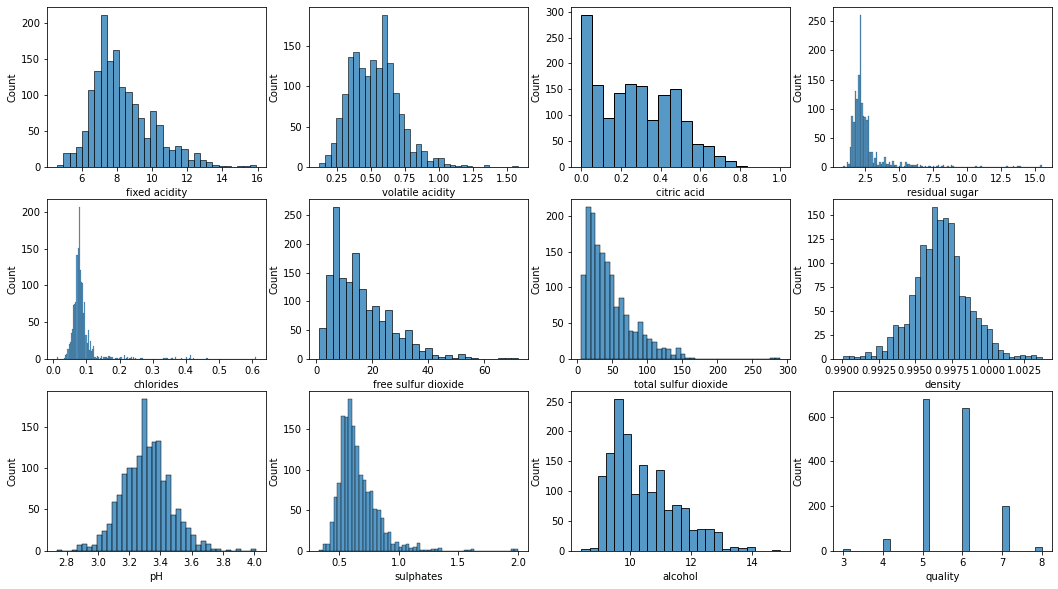

In [93]:
fig, axes = plt.subplots(3, 4, figsize=(18, 10))
for i,c in enumerate(train.columns):

    
    sns.histplot(train[c], kde=False, ax=axes.flat[i])

<AxesSubplot:>

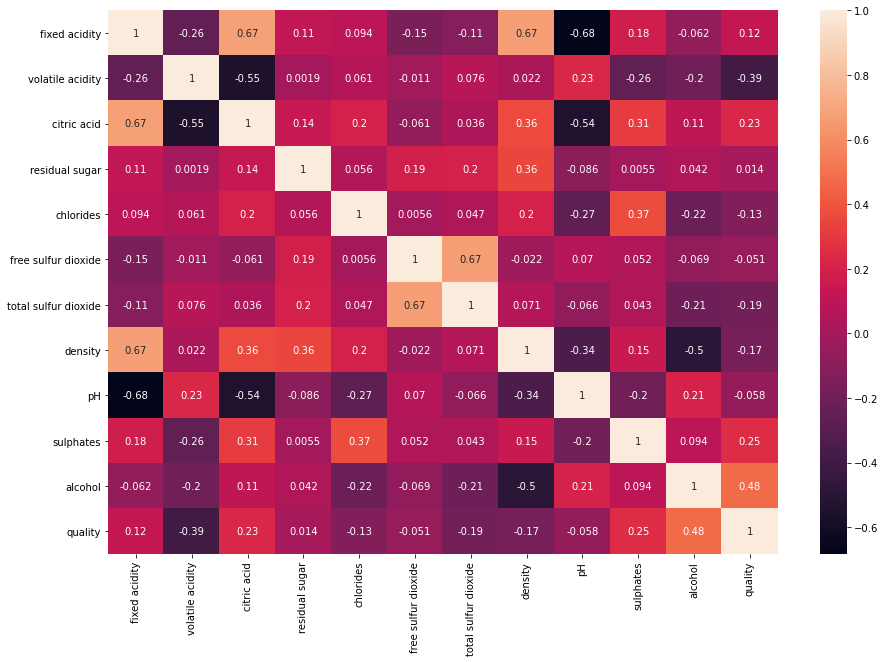

In [94]:
fig, ax = plt.subplots(figsize=(15,10))         # Sample figsize in inches

sns.heatmap(train.corr(), annot=True,ax=ax)

In [95]:
train.corr()[np.abs(train.corr())>0.3].fillna('')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1,,0.671703,,,,,0.668047,-0.682978,,,
volatile acidity,,1,-0.552496,,,,,,,,,-0.390558
citric acid,0.671703,-0.552496,1,,,,,0.364947,-0.541904,0.31277,,
residual sugar,,,,1,,,,0.355283,,,,
chlorides,,,,,1,,,,,0.37126,,
free sulfur dioxide,,,,,,1,0.667666,,,,,
total sulfur dioxide,,,,,,0.667666,1,,,,,
density,0.668047,,0.364947,0.355283,,,,1,-0.341699,,-0.49618,
pH,-0.682978,,-0.541904,,,,,-0.341699,1,,,
sulphates,,,0.31277,,0.37126,,,,,1,,


- абсолютные значения взаимных корреляций не превышают 0,68.

- наибольшая абсолютная коррелированность с целевой переменной 'quality' у признаков 'volatile acidity' (-0.39) и 'alcohol' (0.48). 

- с остальными признаками заметных корреляций не наблюдается.

In [96]:
# Сделайте целевую переменную категориальной ('bad wine': quality < 6.5 и 'good wine': quality > 6.5).
train['quality_'] = ''
train.loc[train['quality']>6.5,'quality_'] = 'good wine'
train.loc[train['quality']<6.5,'quality_'] = 'bad wine'

# Закодируйте целевую переменную.

label_encoder = LabelEncoder()
train['quality'] = label_encoder.fit_transform(train['quality_'])
train.drop(columns = ['quality_'], inplace = True)
train['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [97]:
train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


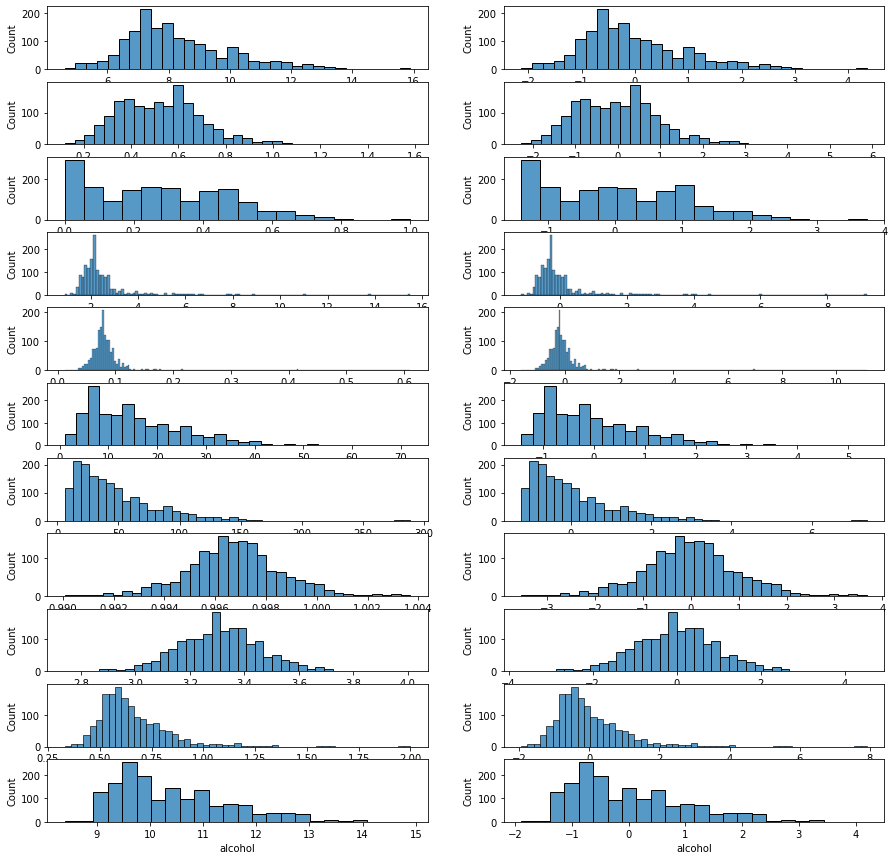

In [101]:

def data_transform(data,col,transform_): 
    # вспомогательная функция для препроцессинга данных
    # позволяет выполнять различные способы масштабирования и нормализации
 
    # data - numpy array
    # transform_ = -1 - bypass
    # transform_ = 0 - StandardScaler
    # transform_ = 1 - Log 
    # transform_ = 2 - GaussRank 
    # transform_ = 3 - Log & StandardScaler
    # transform_ = 4 - GaussRank & StandardScaler
    if transform_ == -1:
        return data
    elif transform_ == 0:
        return std_sc[col].fit_transform(data.reshape(-1,1)).reshape(-1)
    elif transform_ == 1:
        return np.log1p(data).reshape(-1)
    elif transform_ == 2:
        return data # gr_sc[col].fit_transform(data.reshape(-1,1)).reshape(-1)
    elif transform_ == 3:
        return std_sc[col].fit_transform(np.log1p(data).reshape(-1,1)).reshape(-1)
    elif transform_ == 4:
        return data # std_sc[col].fit_transform(gr_sc[col].fit_transform(data.reshape(-1,1))).reshape(-1)

    else:
        print('!!! transform_ is in [-1,4]')
    

def data_inv_transform(data,col,transform_): # для восстановления первоначального распределения
    if transform_ == -1:
        return data
    elif transform_ == 0:
        return std_sc[col].inverse_transform(data.reshape(-1,1)).reshape(-1)
    elif transform_ == 1:
        return np.expm1(data).reshape(-1)
    elif transform_ == 2:
        return data # gr_sc[col].inverse_transform(data.reshape(-1,1)).reshape(-1)
    elif transform_ == 3:
        return np.expm1(std_sc[col].inverse_transform(data.reshape(-1,1))).reshape(-1)
    elif transform_ == 4:
        return data # gr_sc[col].inverse_transform(std_sc[col].inverse_transform(data.reshape(-1,1))).reshape(-1)   
    else:
        print('!!! transform_ is in [-1,4]')
    return (np.exp(data) - 1)


cols2sc = list(train.columns)[:-1]

df = train.copy()
std_sc = {}
# gr_sc = {}
transform = 0 # Use StandardScaler()

fig, axes = plt.subplots(11, 2, figsize=(15, 15))
for i,c in enumerate(cols2sc):
    std_sc[c] = StandardScaler()
#     gr_sc[c] = GaussRankScaler(interp_kind='nearest')  
    sns.histplot(train[c], kde=False, ax=axes.flat[i*2])
    
    df[c] = data_transform(df[c].values,c,transform)
    sns.histplot(df[c], kde=False, ax=axes.flat[i*2+1])

# For inverse transform:    
#     df[c] = data_inv_transform(df[c].values,c,transform)
#     sns.histplot(df[c], kde=False, ax=axes.flat[2])
    

In [83]:
df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,0
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,0


In [ ]:
X_train_scaled = df[cols2sc]

y_train = df.quality

"Обучите модель с наилучшими параметрами и оцените score на кросс-валидации."

In [71]:
C_range = [1e-2, 1, 1e2] 
gamma_range = [1e-1, 1, 'scale','auto'] 
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=C_range, gamma=gamma_range, kernel = kernel)


clf = SVC(random_state=42) #, max_iter = 1000000
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=cv, scoring='accuracy', verbose = 2)
model_grid = grid_search.fit(X_train_scaled,y_train)
print(model_grid.best_score_)
print(model_grid.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END ...................C=0.01, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ...................C=0.01, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ...................C=0.01, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ...................C=0.01, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ...................C=0.01, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .....................C=0.01, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.01, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.01, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.01, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.01, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ......................C=0.01, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.01, gamma=0.

[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ..........................C=1, gamma=1, kernel=poly; total time=   4.1s
[CV] END ..........................C=1, gamma=1, kernel=poly; total time=   1.8s
[CV] END ..........................C=1, gamma=1, kernel=poly; total time=   1.0s
[CV] END ..........................C=1, gamma=1, kernel=poly; total time=   1.5s
[CV] END ..........................C=1, gamma=1, kernel=poly; total time=   1.4s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...................

[CV] END ..................C=100.0, gamma=scale, kernel=poly; total time=   0.2s
[CV] END ..................C=100.0, gamma=scale, kernel=poly; total time=   0.2s
[CV] END ..................C=100.0, gamma=scale, kernel=poly; total time=   0.2s
[CV] END ..................C=100.0, gamma=scale, kernel=poly; total time=   0.1s
[CV] END ..................C=100.0, gamma=scale, kernel=poly; total time=   0.2s
[CV] END ...................C=100.0, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...................C=100.0, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...................C=100.0, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...................C=100.0, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...................C=100.0, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...............C=100.0, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END ...............C=100.0, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END ...............C=10

Лучшим оказалось ядро RBF.

In [72]:
# Не совсем понятно зачем "оценивать score на кросс-валидации", если это уже сделано в процессе фиттинга GridSearchCV...
svc = SVC( C=100, gamma=1, kernel='rbf')
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
cv = cross_val_score(svc,X_train_scaled,y_train,cv=cv, scoring='accuracy')
print(cv)
print(cv.mean())

[0.921875 0.903125 0.9125   0.921875 0.903125]
0.9125
